In [1]:
import process
import importlib as imp

In [3]:
import numpy as np
import sounddevice as sd
from scipy.io import wavfile

In [4]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (Logitech BRIO), MME (2 in, 0 out)
   2 Microphone (3- Realtek(R) Audio, MME (2 in, 0 out)
   3 Analogue 1 + 2 (Focusrite Usb A, MME (8 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  5 Speakers (3- Realtek(R) Audio), MME (0 in, 8 out)
   6 Realtek Digital Output (3- Real, MME (0 in, 2 out)
   7 Speakers (Focusrite Usb Audio), MME (0 in, 8 out)
   8 S23C350 (2- NVIDIA High Definit, MME (0 in, 2 out)
   9 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
  10 Microphone (Logitech BRIO), Windows DirectSound (2 in, 0 out)
  11 Microphone (3- Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 Analogue 1 + 2 (Focusrite Usb Audio), Windows DirectSound (8 in, 0 out)
  13 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  14 Speakers (3- Realtek(R) Audio), Windows DirectSound (0 in, 8 out)
  15 Realtek Digital Output (3- Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
 

In [5]:
#data=process.time_rec('meme',10)
fs,data = wavfile.read('meme.wav')

(480000,)

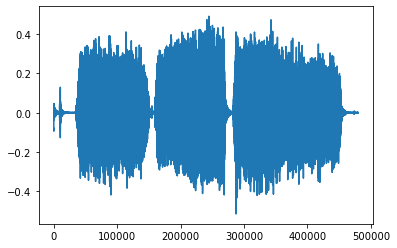

In [8]:
import matplotlib.pyplot as plt
plt.plot(data)
data.shape

In [9]:
spec = process.spectrogram(data,8192,8000)

(4097, 2458)


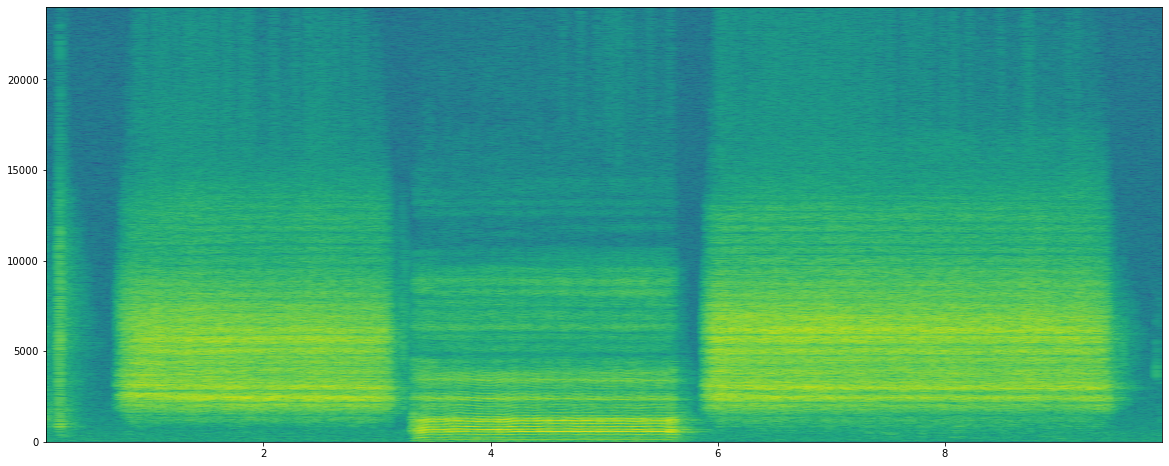

In [10]:
plt.figure(figsize=(20,8))
plt.pcolormesh(spec['t'],spec['f'],20*np.log10(spec['s'][0]),shading='gouraud');

In [13]:
imp.reload(process)
spec = process.spectrogram(data,8192,8000,logf=True)

(4097, 2458)


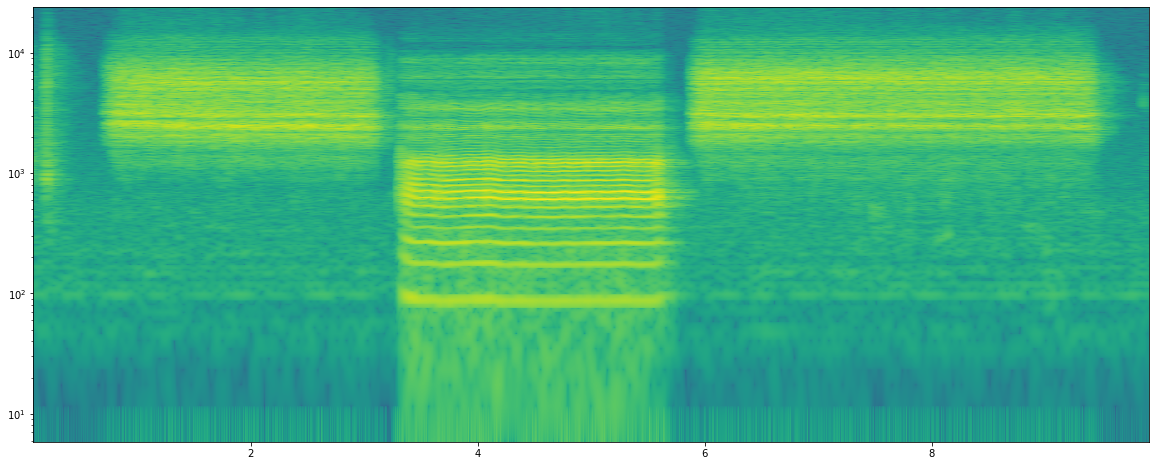

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.pcolormesh(spec['t'],spec['f'],20*np.log10(spec['s'][0]),shading='auto')
ax.set_yscale('log')

In [58]:
imp.reload(process)
spec = process.spectrogram(data,1024,0)

(513, 468)


In [16]:
import soundscape
ts, aci = soundscape.acoustic_complexity(spec,5)

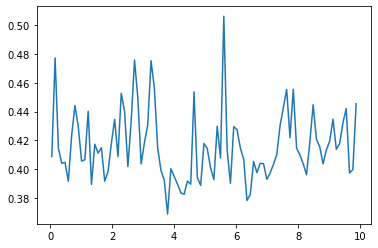

In [17]:
plt.plot(ts,aci[0,:]/1024)

In [18]:
imp.reload(soundscape)
ts, ndsi = soundscape.ndsi(spec,5)

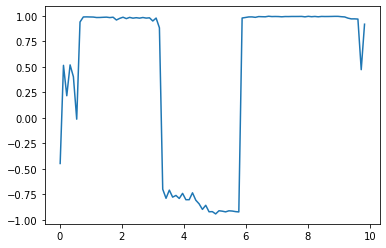

In [19]:
plt.plot(ts,ndsi[0,:])

In [59]:
imp.reload(soundscape)
ts, BI = soundscape.bioacoustic_index(spec,10)

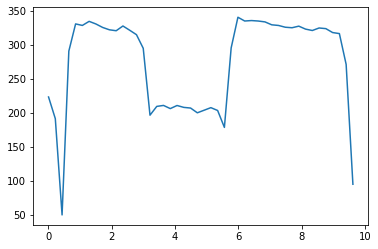

In [60]:
plt.plot(ts,BI[0,:])

In [22]:
spec['s'].shape

(1, 513, 468)

In [47]:
ts, HS = soundscape.spectral_entropy(spec,50)

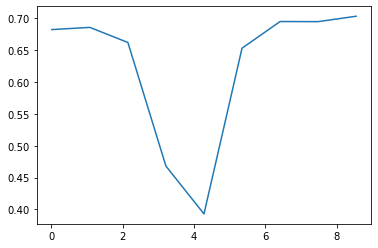

In [48]:
plt.plot(ts,HS[0,:])

In [51]:
tstep = 10
ts = np.arange(0,spec['nt']-tstep,tstep)
subspecs = np.array([np.array(spec['s'][0,:,t0:t0+tstep]) for t0 in ts])

In [52]:
spec['s'].shape

(1, 513, 468)

In [55]:
spec_AEI = np.array([20*np.log10(s/np.max(s)) for s in subspecs])

In [64]:
spec_AEI_bands = [spec_AEI[:,int(bands_bin[k]):int(bands_bin[k]+bands_bin[1]),] for k in range(len(bands_bin))]

In [83]:
max_freq=10000; db_threshold = -50; freq_step=1000
bands_Hz = range(0, max_freq, freq_step)
bands_bin = [f / spec['df'] for f in bands_Hz]

In [84]:
spec_AEI_bands[2].shape

(46, 22, 10)

In [86]:
values = [np.sum(spec_AEI_bands[k]>db_threshold,axis=0)/float(spec_AEI_bands[k].size) for k in range(len(bands_bin))]


In [110]:
values = [np.array([np.sum(spec_AEI_bands[k][t0,:,:]>db_threshold)/float(spec_AEI_bands[k][t0,:,:].size) for k in range(len(bands_bin))]) for t0 in range(nts)]

In [119]:
imp.reload(soundscape)
ts, AEI = soundscape.acoustic_evenness(spec,10)

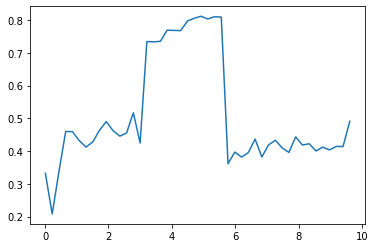

In [120]:
plt.plot(ts,AEI[0,:])

In [121]:
anthrophony=[1000,2000]; biophony=[2000,11000]

In [122]:
anthro_bin = [int(np.around(a/spec['df'])) for a in anthrophony]
bio_bin = [int(np.around(a/spec['df'])) for a in biophony]

In [125]:
bio_bin

[43, 235]

In [124]:
bio_bin = [int(np.around(a/spec['df'])) for a in biophony]

In [126]:
np.sum(spec['s'][0,anthro_bin[0]:anthro_bin[1],0:0+tstep])

6.289851441471969e-06

In [131]:
np.array([np.sum(spec['s'][0,anthro_bin[0]:anthro_bin[1],t0:t0+tstep])for t0 in ts])

array([4.77035730e-06, 3.50398417e-08, 2.75530200e-08, 6.28549179e-06,
       9.96706656e-06, 1.52379334e-05, 1.41313584e-05, 1.41596595e-05,
       3.00354180e-05, 1.59067318e-05, 1.59869426e-05, 1.90985994e-05,
       1.51653719e-05, 1.46722837e-05, 4.02366211e-07, 2.45992043e-04,
       3.47074102e-04, 4.57534520e-04, 5.71275676e-04, 5.08554494e-04,
       6.43722049e-04, 7.03507295e-04, 8.29345383e-04, 1.11413813e-03,
       9.30736222e-04, 7.51925619e-04, 5.21988334e-06, 1.40552928e-05,
       1.09915182e-05, 1.14394098e-05, 9.27732257e-06, 5.30103313e-06,
       6.41840697e-06, 7.14492048e-06, 4.78052378e-06, 4.15584117e-06,
       6.01728812e-06, 5.00723593e-06, 4.29005144e-06, 3.91941114e-06,
       4.05954101e-06, 2.73794015e-06, 5.51520585e-06, 7.13415194e-06,
       2.57905742e-08, 3.71967401e-09])

In [130]:
imp.reload(soundscape)
ts,t,nts = soundscape.timewindow(spec,tstep)

In [146]:
subspecs = [np.array(spec['s'][0,:,t0:t0+tstep]) for t0 in ts]
spec_BI = np.array([20*np.log10(s/np.max(s)) for s in subspecs])

In [147]:
spec_BI.shape

(46, 513, 10)

In [137]:
spec_BI2 = 20*np.log10(spec['s'][0,:]/np.max(spec['s']))

In [138]:
spec_BI2.shape

(513, 468)

In [141]:
spec_BI2_mean = np.array([10*np.log10(np.mean(np.power(10,(spec_BI2[:,t0:t0+tstep]/10)), axis=1))for t0 in ts])

In [142]:
spec_BI2_mean.shape

(46, 513)

In [148]:
spec_BI_mean = 10*np.log10(np.mean(np.power(10,spec_BI), axis=-1))

In [149]:
spec_BI_mean

(46, 513)

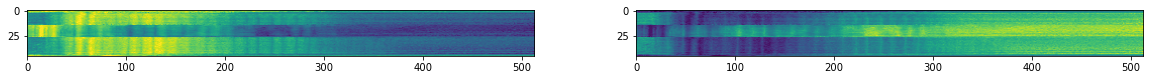

In [154]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(spec_BI_mean)
ax2.imshow(spec_BI2_mean-spec_BI_mean)

In [155]:
spec_BI2_mean-spec_BI_mean

array([[ 736.66978396,  651.91285713,  515.91125081, ..., 1018.52383276,
        1059.43608453, 1116.4084961 ],
       [ 249.25970599,  152.2839076 ,   18.97507979, ...,  679.89717482,
         696.53614765,  675.58717092],
       [ 570.3570787 ,  448.2675527 ,  334.75724603, ...,  913.45524507,
         905.02616887,  981.29038256],
       ...,
       [ 749.2202382 ,  779.56302578,  837.42046204, ..., 1333.98356891,
        1409.60802087, 1474.52133378],
       [ 550.0356869 ,  560.69741332,  430.01287348, ...,  961.69825517,
         930.31449954,  985.84559994],
       [ 260.37179672,  169.80645117,   23.22598659, ...,  619.96528315,
         556.9006439 ,  604.70587971]])

In [156]:
spec_BI_mean_segment =  spec_BI_mean[:,200:220]

In [158]:
spec_BI2_mean

array([[-134.36483311, -125.4455509 , -112.30326158, ..., -167.01271026,
        -172.00948224, -180.43389263],
       [-140.68674118, -128.27936142, -111.47836068, ..., -185.63719533,
        -186.6937034 , -185.24109534],
       [-145.02549576, -130.12265196, -117.34677583, ..., -181.36155091,
        -181.42752556, -189.98377247],
       ...,
       [-109.9363836 , -112.90195624, -113.57182529, ..., -174.75253093,
        -182.73522618, -190.12460617],
       [-137.66914139, -136.43440555, -120.83665033, ..., -181.40437974,
        -177.28675564, -183.05177866],
       [-139.50657761, -129.42934697, -110.06857244, ..., -180.97968126,
        -175.64111957, -181.16442915]])

In [195]:
def subspecs(spec,tstep):
    ts = np.arange(0,spec['nt']-tstep,tstep)
    nts = len(ts)
    subs = np.array([spec['s'][:,:,t0:t0+tstep] for t0 in ts])
    ts += tstep//2    
    return subs.swapaxes(0,1),spec['t'][ts],nts

In [196]:
subs,t,nts = subspecs(spec,10)

In [197]:
subs.shape

(1, 46, 513, 10)

In [223]:
spec_av =  np.array([np.sum(spec['s'][0,:,t0:t0+tstep],axis=-1) for t0 in ts])

In [224]:
spec_av2 = np.sum(subs[0],axis=-1)

In [213]:
spec_av.shape

(46, 513)

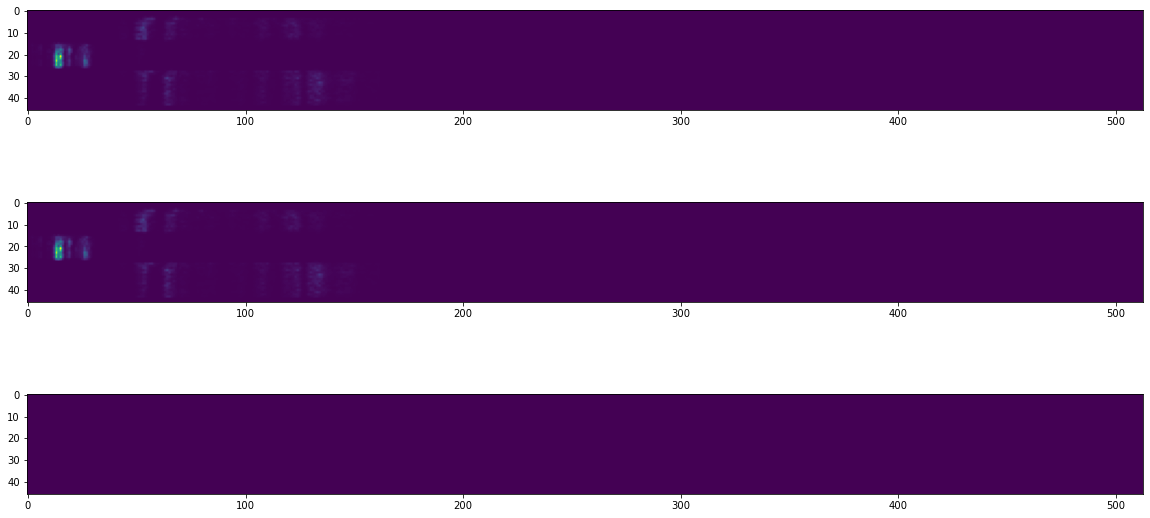

In [225]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,10))
ax1.imshow(spec_av2)
ax2.imshow(spec_av)
ax3.imshow(spec_av-spec_av2)

In [226]:
spec_av-spec_av2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
ts[0]

0

In [235]:
n=0
subspec,t,nts = subspecs(spec,10)
spec_av =  np.sum(subspec[n],axis=-1)
spec_avav = np.sum(spec_av,axis=-1)
spec_av /= spec_avav[:,np.newaxis]
spec_av

array([[7.82640270e-05, 6.25504172e-05, 2.23930063e-04, ...,
        1.36595994e-07, 1.12007510e-07, 5.95972183e-08],
       [2.75526278e-05, 5.42932622e-05, 3.84079658e-04, ...,
        4.69135955e-07, 2.37700652e-07, 8.95124836e-08],
       [2.20791308e-03, 1.72102615e-02, 9.07568160e-02, ...,
        3.73116714e-05, 2.76904163e-05, 1.78240638e-05],
       ...,
       [3.13780785e-06, 2.60114216e-06, 1.75082648e-06, ...,
        1.95991649e-09, 1.65842625e-09, 3.10113508e-10],
       [2.91971427e-06, 6.19926591e-06, 2.35624141e-05, ...,
        6.17258765e-09, 8.40261621e-09, 3.91737402e-09],
       [1.55111888e-03, 3.12916882e-03, 3.00317381e-02, ...,
        1.00571619e-05, 9.18456504e-06, 4.68496171e-06]])

In [234]:
spec_av =  np.sum(subspec[n],axis=-1)
spec_av /= np.sum(spec_av,axis=-1)[:,np.newaxis]
spec_av

array([[7.82640270e-05, 6.25504172e-05, 2.23930063e-04, ...,
        1.36595994e-07, 1.12007510e-07, 5.95972183e-08],
       [2.75526278e-05, 5.42932622e-05, 3.84079658e-04, ...,
        4.69135955e-07, 2.37700652e-07, 8.95124836e-08],
       [2.20791308e-03, 1.72102615e-02, 9.07568160e-02, ...,
        3.73116714e-05, 2.76904163e-05, 1.78240638e-05],
       ...,
       [3.13780785e-06, 2.60114216e-06, 1.75082648e-06, ...,
        1.95991649e-09, 1.65842625e-09, 3.10113508e-10],
       [2.91971427e-06, 6.19926591e-06, 2.35624141e-05, ...,
        6.17258765e-09, 8.40261621e-09, 3.91737402e-09],
       [1.55111888e-03, 3.12916882e-03, 3.00317381e-02, ...,
        1.00571619e-05, 9.18456504e-06, 4.68496171e-06]])

In [236]:
spec_BI = np.array([20*np.log10(ss/np.max(ss)) for ss in subspec[0]])

In [237]:
spec_BI.shape

(46, 513, 10)

In [238]:
spec_BI2 = 20*np.log10(subspec[0]/np.max(subspec[0]))

In [241]:
np.max(subspec[0])

0.00019476645455555164

In [251]:
aa = np.sum(np.sum(np.diff(subspec),axis=-1)/np.sum(subspec[0],axis=-1),axis=-1)
aa.shape

(1, 46)